C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e+03, tolerance: 1.155e+03
  model = cd_fast.enet_coordinate_descent(


Linear Regression - R-squared: 0.9994, RMSE: 2.7596
Lasso Regression - R-squared: 0.9991, RMSE: 3.4124
Ridge Regression - R-squared: 0.9994, RMSE: 2.7597


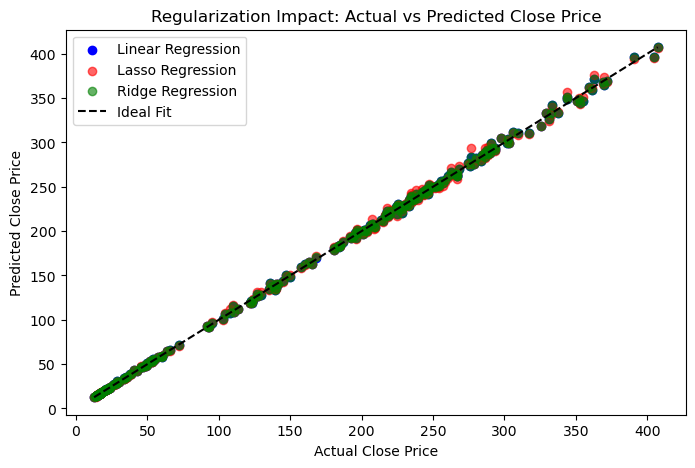

Predicted Close Price for Given Inputs: 152.46


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error

file_path = "C:\\Users\\Dharani Ravi\\Desktop\\ML projects\\stockprice\\data\\AAPL.csv"
df = pd.read_csv(file_path, skiprows=1)

df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = df.iloc[1:].reset_index(drop=True)

df[["Close", "High", "Low", "Open", "Volume"]] = df[["Close", "High", "Low", "Open", "Volume"]].astype(float)
df["Date"] = pd.to_datetime(df["Date"])

X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Linear Regression - R-squared: {r2_linear:.4f}, RMSE: {rmse_linear:.4f}")
print(f"Lasso Regression - R-squared: {r2_lasso:.4f}, RMSE: {rmse_lasso:.4f}")
print(f"Ridge Regression - R-squared: {r2_ridge:.4f}, RMSE: {rmse_ridge:.4f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso Regression', alpha=0.6)
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label='Ideal Fit')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Regularization Impact: Actual vs Predicted Close Price")
plt.legend()
plt.show()

future_data = pd.DataFrame({
    "Open": [150],
    "High": [155],
    "Low": [148],
    "Volume": [1000000]
})
future_prediction = linear_model.predict(future_data)
print(f"Predicted Close Price for Given Inputs: {future_prediction[0]:.2f}")
